# Cleaning data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

checking if all column lables are string

In [5]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

changing all the columns into string type

In [6]:
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-8-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [9]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area Plots
An area chart combines the line chart and bar chart to show how one or more groups' numeric values change over the progression of a second variable, typically that of time

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_can.head(5)

In [ ]:
# get the top 5 entries
df_top5 = df_can.head(5)
df_top5

In [ ]:
# transpose the dataframe
df_top5 = df_top5[years].transpose() # This will switch the column and rows.
df_top5

Area plots are stacked by default and to produce stacked area plot, each column must be either all positive or negatice. To produce unstacked plot, set `stacked` to `False`

In [ ]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

You can also change the transparency of the graph by adding the alpha value.

In [ ]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Histograms
histogram is a way to show the frequency distribution of numeric dataset.
- x-axis being x values seperated into bins
- y-axis is the frequenecy or the number of data points in each bin

In [10]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6825.8 to 10238.7 immigrants, and so on..


Graphing the data
- xticks allows the x-axis label to match the bin size

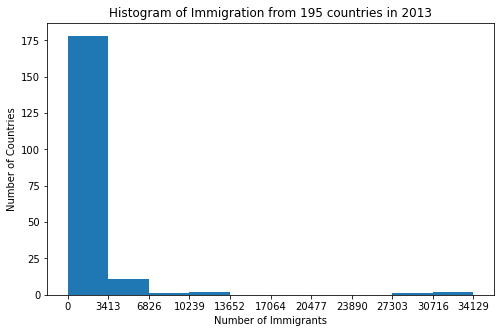

In [16]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

We can also plot multiple histograms on the same plot

In [17]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


Remember to transpose since the columns are going to be the x-axis.

In [18]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


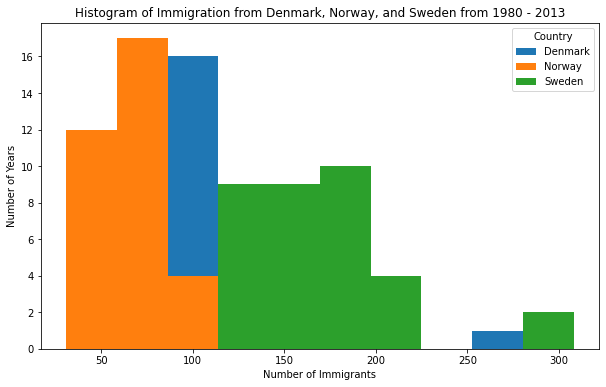

In [19]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter; (normal bin size is 10)
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.

In [ ]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

- If we do not want the plots to overlap, we write `stacked=True`
- we can also adjust the min and max of x-axis by using the `xlim` parameter

In [ ]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts
Bar Chart is a way of representing data where the length of the bars represents the size of the variable. 
- They usually represent numerical and categorical variables grouped in intervals
- `kind=bar` creates vertical bar plot
- `kind=barh` creates horizontal bar plot

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured.

In [ ]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head(5)

In [ ]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

Let's annotate this on the plot using the `annotate` method. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=80)  # rotate the xticks(labelled points on x-axis) by 80 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('hi',  # s: str. description of the line
             xy=(32, 70),  # place head of the arrow at point (year 2012(32nd index) , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=80)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('hi',  # s: str. description of the line
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()